## Healthcare PGP

## Problem Statement

•	NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. <br>
•	The dataset used in this project is originally from NIDDK. 


## Objective

•	Predict whether a patient has diabetes or not <br>
•	Build a model to accurately predict whether the patients in the dataset have diabetes or not

## Dataset Description

Dataset contains certain diagnostic measurements of several medical predictor variables and one target variable (Outcome)

The independent variables in this data set are - Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

•	__Pregnancies:__ Number of times pregnant <br>
•	__Glucose:__ Plasma glucose concentration in an oral glucose tolerance test <br>
•	__BloodPressure:__ Diastolic blood pressure (mm Hg) <br>
•	__SkinThickness:__ Triceps skinfold thickness (mm) <br>
•	__Insulin:__ Two hour serum insulin <br>
•	__BMI:__ Body Mass Index <br>
•	__DiabetesPedigreeFunction:__ Diabetes pedigree function <br>
•	__Age:__ Age in years <br>
•	__Outcome:__ Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0 <br>


268 of 768 values are 1, and the others are 0

## Steps followed:

1. Import required libraries

2. Load dataset

3. __Data Exploration:__ <br> 
 3.1 __Perform descriptive analysis:__ <br>
  3.1.1 Head <br>
  3.1.2 Shape <br>
  3.1.3 Types of columns <br>
  3.1.4 Summary <br>

 3.2. __Data Pre-processing/ Data cleaning:__ <br>
  3.2.1 Duplicate value check <br>
  3.2.2 Missing value/ Null value check <br>
  3.2.3 Check distributions of each feature before treating missing values usign histogram <br>
  3.2.4 Check correlation <br>
  3.2.5 Treat missing values <br><br>

4. __Data Visualization:__ <br>
 4.1 Count plot to see if dataset is balanced <br>
 4.2 Histogram to check if the data distribution is Normal / Skewed <br>
 4.3 Box plot to check and handle outliers <br>
 4.4 Scatter plots to understand relationship between variables <br><br>

5. Check correlation using heatmap after treating missing values and outliers <br><br>

6. __Data Transformation:__ <br>
 Normalization <br><br>

7. Split data to train and test data <br><br>

8. __Data Modelling:__  <br>
 8.1 Build model with train data <br>
 8.2 Predict for test data using model <br>
 8.3 Check model accuarcy <br>
 8.4 Compare with other models <br><br>
 
9. __Dashboard/ Data Reporting:__ <br>
a. Pie chart to describe the diabetic or non-diabetic population <br>
b. Scatter charts between relevant variables to analyze the relationships <br>
c. Histogram or frequency charts to analyze the distribution of the data <br>
d. Heatmap of correlation analysis among the relevant variables <br>
e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart. <br>

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


### 1. Import required libraries

In [8]:
# Import libraries 
import os
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

In [9]:
print(os.getcwd())

C:\Users\a2\OneDrive\Documents\Asha\Classes\Simplilearn\10-Capstone\Project 2


### 2. Load the data

In [10]:
os.chdir('C:/Users/a2/OneDrive/Documents/Asha/Classes/Simplilearn/10-Capstone/Project 2/Healthcare - Diabetes')
print(os.getcwd())
data=pd.read_csv("health care diabetes.csv")

C:\Users\a2\OneDrive\Documents\Asha\Classes\Simplilearn\10-Capstone\Project 2\Healthcare - Diabetes


### 3. Data exploration/ Descriptive data Analysis

### 3.1 Understanding dataset

In [11]:
# 3.1.1 Shape - count of cols and rows
print("\n This data set has {} rows and {} columns. So, the dataset has {} features \n".format(data.shape[0], data.shape[1], data.shape[1]-1))

# 3.1.2 Head - get first 5 data rows
display(data.head(3))


 This data set has 768 rows and 9 columns. So, the dataset has 8 features 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [125]:
# Column names
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [126]:
# 3.1.3 get datatypes of columns
display(data.dtypes)
display(data.dtypes.value_counts())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

int64      7
float64    2
dtype: int64

In [127]:
# 3.1.4 data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
# 3.1.4 get summary stats for data
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

display(data.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Observations:
1. Data info shows zero null values, but the data description shows value=0 for some variables. <br>
The min value for Glucose, BP, Insulin, BMI is 0. A person has to have some +ve value for Glucose, BP, etc... So, these must be missing values and have to be treated <br><br>

2. Dataset has 7 integer and 2 float data types. Out of the float types, BMI and DiabetesPedigreeFunction are continuous, rest of the variables are discrete

### 3.2 - Data pre-processing / Data Cleaning

In [129]:
# 3.2.1 - Check for duplicates
data.duplicated().sum()

0

### Missing value analysis

In [130]:
# 3.2.2 - Check for missing values 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [131]:
# Filling in missing values with NaN
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

# check missing values after filling with NaN value
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Observation:
After filling zero values with NaN, we can see the # of null values that need to be treated. Before treating we need to check the data distribution

### Using matrix to understand the distribution of data and heatmap chart to see relation of missing value columns

<AxesSubplot:>

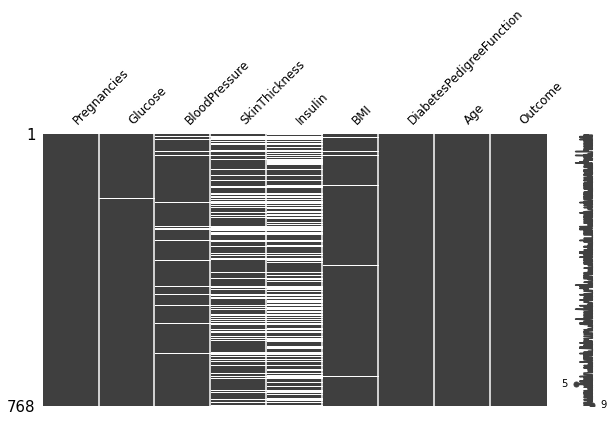

In [132]:
missingno.matrix(data,figsize=(10,5), fontsize=12)

#### The above matrix shows a lot of missing values in SkinThickness and Insulin columns. 
#### Very few values missing in Glucose column

<AxesSubplot:>

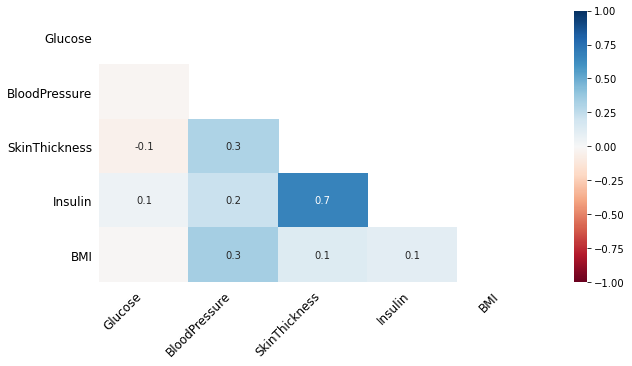

In [133]:
missingno.heatmap(data, figsize=(10,5), fontsize=12)

#### We see a high correlation between SkinThickness and Insulin

#### Plot data using histograms to understand the distribution of each column and see which column has uniform distribution,skew or semi skewed distributions.

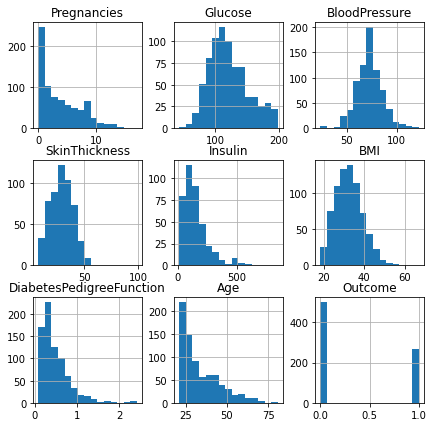

In [134]:
# 3.2.3 Check distributions of each feature usign histogram before treating missing values
data.hist(bins=15,figsize=(7,7))
plt.show()

#### The Pregnancies, SkinThickness, Insulin, BMI, DPF, and Age have a skewed distribution(have outliers), so their mean is affected by the outliers. Hence median is better to replace the 0 values in these columns. 
#### Glocose and BP have normal distributions hence we can replace the 0 values in those columns by mean value.

<AxesSubplot:>

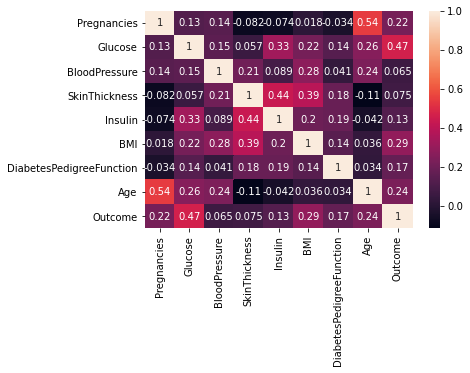

In [14]:
# 3.2.4 see correlation among features
sns.heatmap(data.corr(), annot=True)

### Observations:
•	A heatmap is a two-dimensional representation of information with the help of colors. Heatmaps can help the user visualize simple or complex information.<br>
•	Outcome (Target Variable) has high correlation with Glucose.<br>
•	Pregnancies and Age are correlated. <br>
•	SkinThickness and Insulin are highly correlated. <br>

In [136]:
# storing correlation matrix to csv file to create chart in Tableau
data_heatmap = data.corr()
data_heatmap.to_csv('C:/Users/a2/OneDrive/Documents/Asha/Classes/Simplilearn/10-Capstone/Project 2/Healthcare - Diabetes/Corr_matrix1.csv')

### 3.2.5 Missing value treatment

In [137]:
# Copy data for treating missing values
data1 = data.copy()
data1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0


In [138]:
# Treat the missing values in the skewed colums with median and the normally distributed columns with maen value

data1['Glucose'].fillna(data1['Glucose'].mean(),inplace=True) #normal distribution
data1['BloodPressure'].fillna(data1['BloodPressure'].mean(),inplace=True) #normal distribution
data1['SkinThickness'].fillna(data1['SkinThickness'].median(),inplace=True) #skewed distribution
data1['Insulin'].fillna(data1['Insulin'].median(),inplace=True) #skewed distribution
data1['BMI'].fillna(data1['BMI'].median(),inplace=True) #skewed distribution

data1.shape


(768, 9)

In [139]:
#print the statistics after missing value treatment the values
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [140]:
# check for nulls after treating missing values
display(data1.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Now the above data is free of nulls

### 4. Data Visualization

### 4.1 Count plot to see if dataset is balanced or not

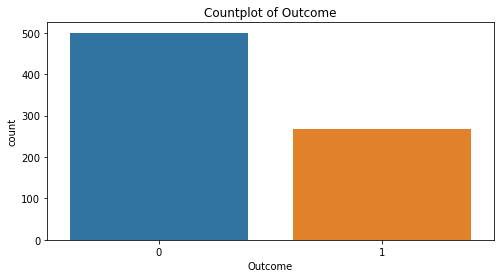

In [141]:
# check distribution of target vriable, the Outcome column
plt.figure(figsize = (8,4))
sns.countplot(data1["Outcome"])
plt.title("Countplot of Outcome")
plt.show()

#### From above, we can see that people without diabetes are higher than people with diabetes. This indicates that the data is imbalanced.

### 4.2 Histogram to check if the data distribution is Normal / Skewed

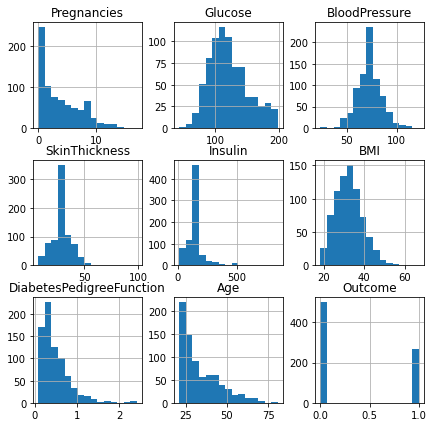

In [142]:
# check distributions after treating missing values
data1.hist(bins=15,figsize=(7,7))
plt.show()

In [143]:
# Check the data skewness using scipy library for all features/cols
from scipy.stats import skew

# skewness in original data after missing value treatment
display(skew(data1))

array([0.89991194, 0.53167763, 0.13703705, 0.83597149, 3.37341394,
       0.59806151, 1.9161592 , 1.12738926, 0.6337757 ])

### 4.3 Box plot to check outliers and handle outliers

<AxesSubplot:xlabel='Pregnancies'>

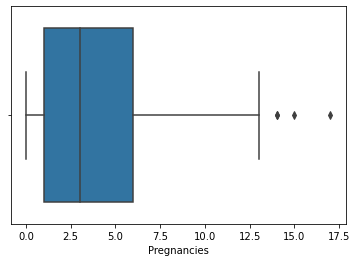

In [144]:
# Using boxplot to detect outliers
sns.boxplot(data=data1,x='Pregnancies')

<AxesSubplot:xlabel='Pregnancies'>

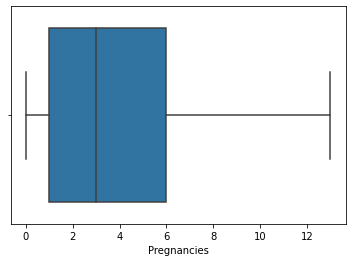

In [145]:
data_clean = data1[data1["Pregnancies"] <= 13]

# check after removing outliers
sns.boxplot(data=data_clean, x='Pregnancies')

<AxesSubplot:xlabel='Glucose'>

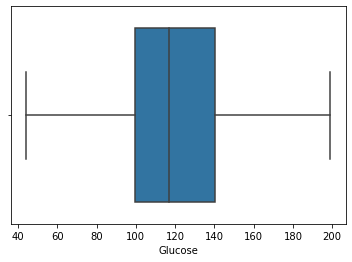

In [146]:
# repeat this for all columns

sns.boxplot(data=data1,x='Glucose')

#### No outliers detected in Glucose column

<AxesSubplot:xlabel='BloodPressure'>

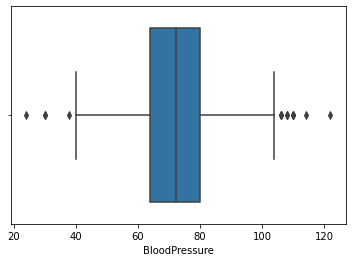

In [147]:
sns.boxplot(data=data1,x='BloodPressure')

#### BP less than 39 and greater than 105 have been removed

<AxesSubplot:xlabel='BloodPressure'>

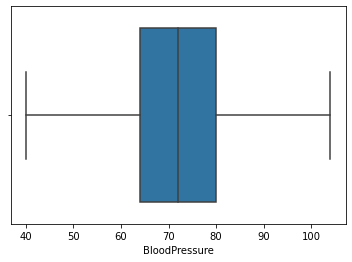

In [148]:
data_clean = data_clean[data_clean["BloodPressure"] >= 39] 
data_clean = data_clean[data_clean["BloodPressure"] <= 105]

# check after removing outliers
sns.boxplot(data=data_clean, x='BloodPressure')

<AxesSubplot:xlabel='SkinThickness'>

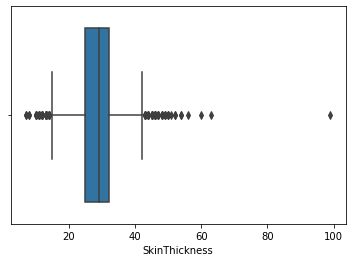

In [149]:
sns.boxplot(data=data1,x='SkinThickness')

#### Skinthickness above 60 has been removed

<AxesSubplot:xlabel='SkinThickness'>

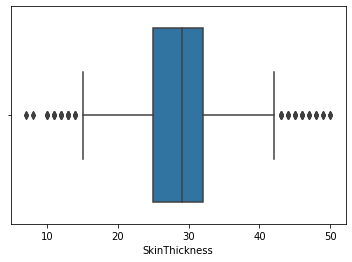

In [150]:
data_clean = data_clean[data_clean["SkinThickness"] <= 50] 

# check after removing outliers
sns.boxplot(data=data_clean, x='SkinThickness')

<AxesSubplot:xlabel='Insulin'>

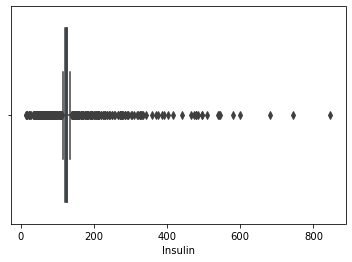

In [151]:
sns.boxplot(data=data1,x='Insulin')

#### Insulin level above 500 can skew the resultsm hence removed

<AxesSubplot:xlabel='Insulin'>

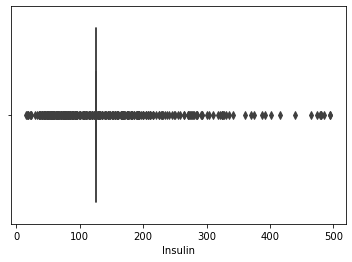

In [152]:
data_clean = data_clean[data_clean["Insulin"] <= 500] 
#data_clean = data_clean[data_clean["Insulin"] <= 300] 

# check after removing outliers
sns.boxplot(data=data_clean, x='Insulin')

<AxesSubplot:xlabel='BMI'>

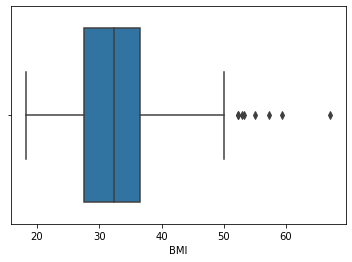

In [153]:
sns.boxplot(data=data1,x='BMI')

#### BMI > 60 is removed

<AxesSubplot:xlabel='BMI'>

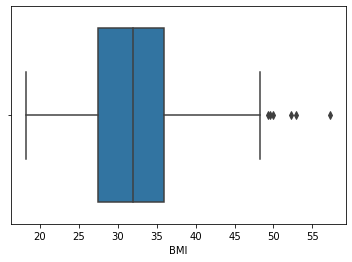

In [154]:
data_clean = data_clean[data_clean["BMI"] <= 60] 

# check after removing outliers
sns.boxplot(data=data_clean, x='BMI')

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

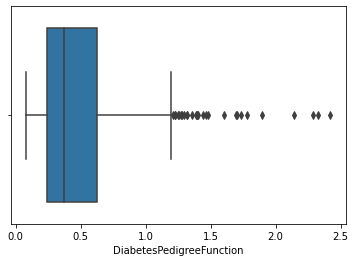

In [155]:
sns.boxplot(data=data1,x='DiabetesPedigreeFunction')

#### value above 2.0 is removed

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

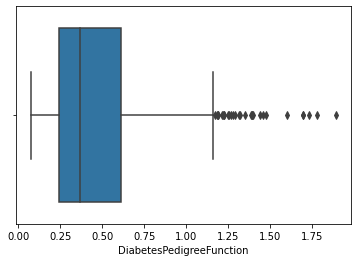

In [156]:
data_clean = data_clean[data_clean["DiabetesPedigreeFunction"] <= 2.0] 

# check after removing outliers
sns.boxplot(data=data_clean, x='DiabetesPedigreeFunction')

<AxesSubplot:xlabel='Age'>

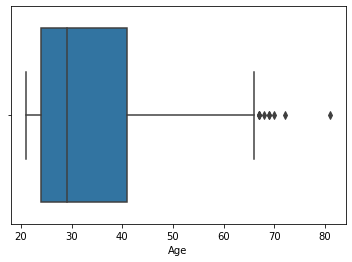

In [157]:
sns.boxplot(data=data1,x='Age')

#### Age above 70 is removed

<AxesSubplot:xlabel='Age'>

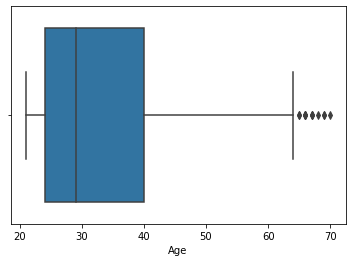

In [158]:
data_clean = data_clean[data_clean["Age"] <= 70] 

# check after removing outliers
sns.boxplot(data=data_clean, x='Age')

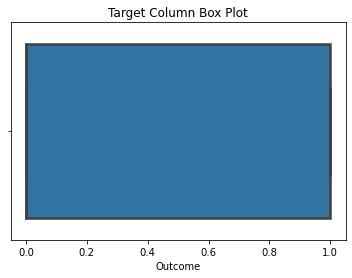

In [159]:
# check outliers in target column
sns.boxplot(x = data1["Outcome"], orient = 'h', linewidth = 2.5 )
plt.title("Target Column Box Plot")
plt.show()

#### There are no outliers in Target column

### Plot data using histograms to understand the distribution of each column and see which column has uniform distribution,skew or semi skewed distributions.

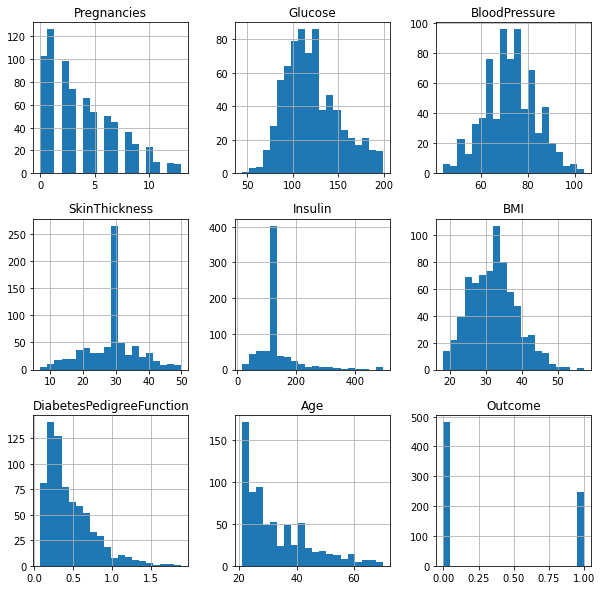

In [160]:
# plot data after outlier removal
data_clean.hist(bins = 20, figsize = (10,10))
plt.show()

#### We can see that the Blood Pressure, SkinThickness columns have the normal distribution while the rest have skewed distributions.

In [161]:
# Check the data skewness using scipy library for all features/cols
from scipy.stats import skew

# skewness in original data
display(skew(data))

# skeness after cleaning - missing value and outlier treatments
display(skew(data_clean))

array([0.89991194,        nan,        nan,        nan,        nan,
              nan, 1.9161592 , 1.12738926, 0.6337757 ])

array([ 0.79837625,  0.54756243,  0.04220556, -0.05197569,  2.39385668,
        0.3778768 ,  1.45482594,  1.10319904,  0.68536343])

### 4.4. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

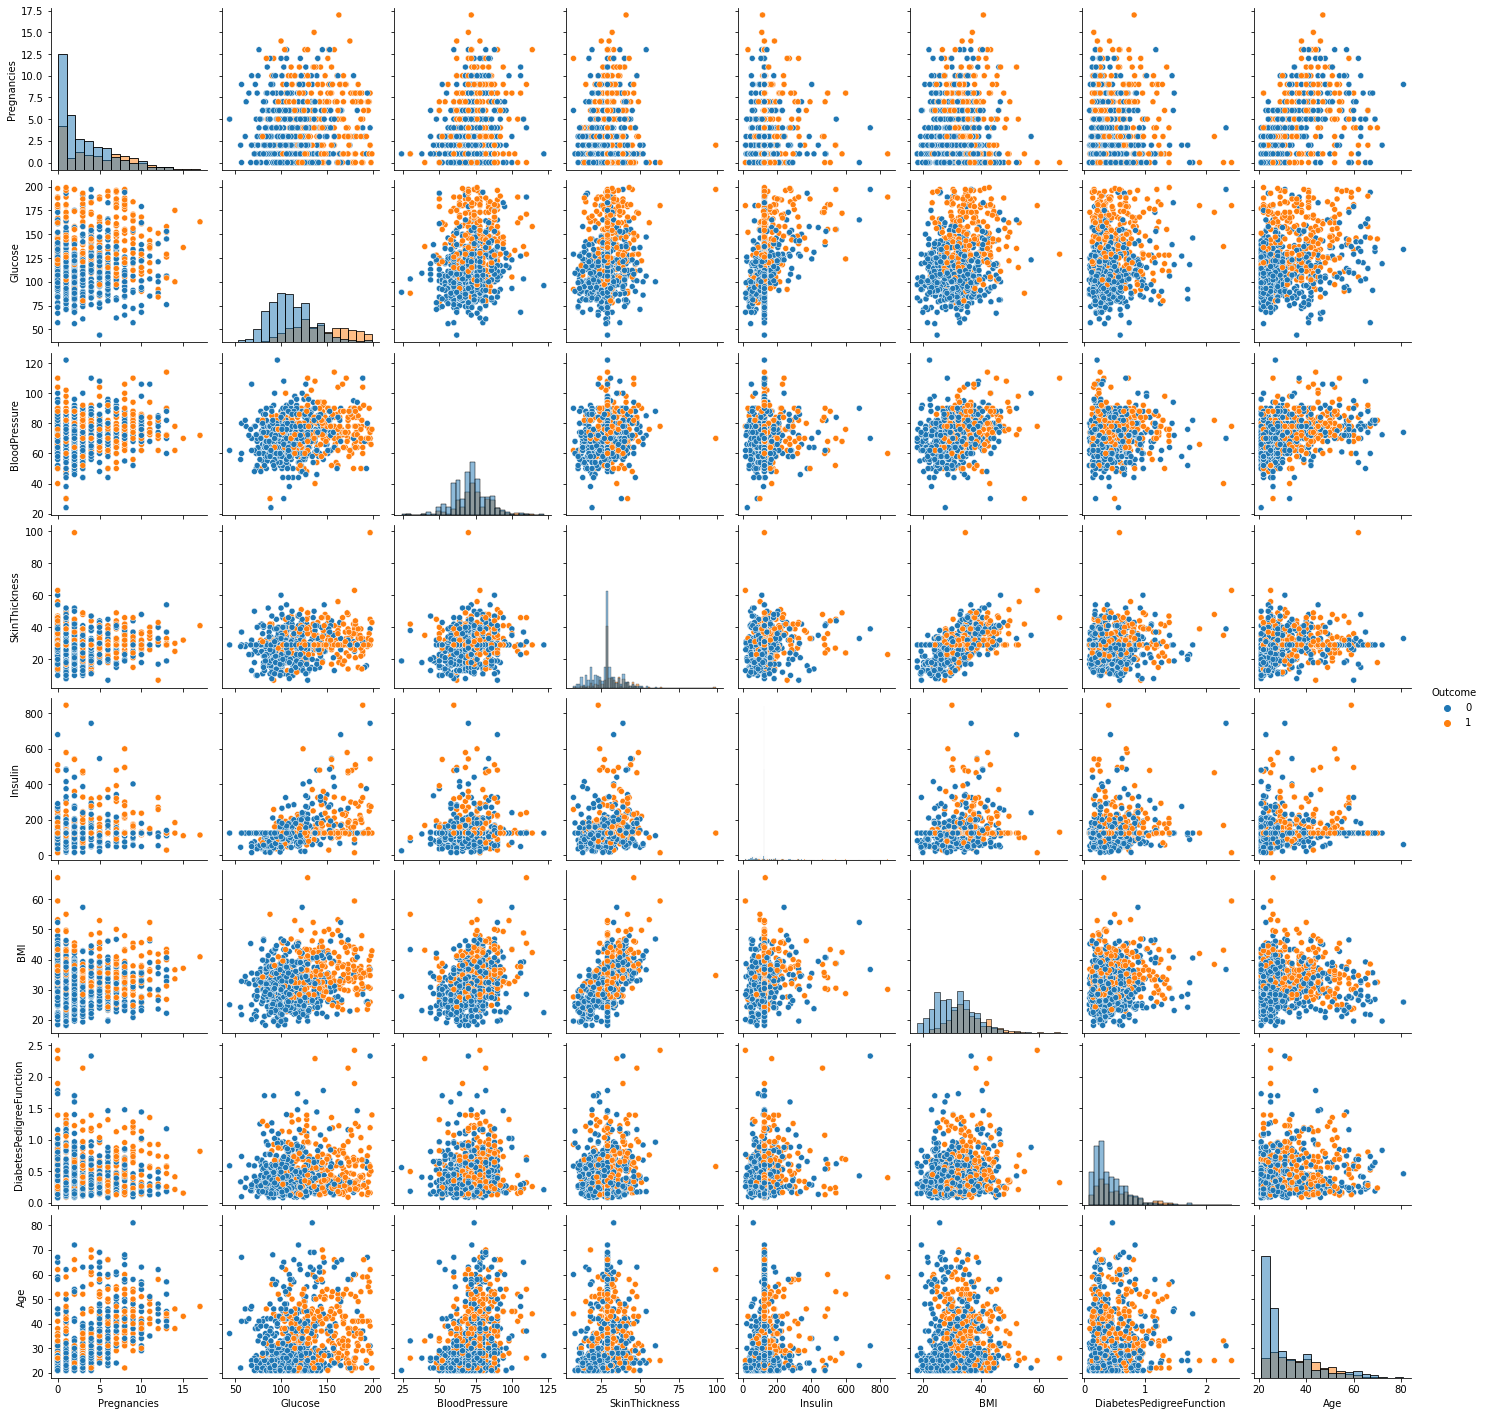

In [162]:
#sns.pairplot(data1)
#plt.title('scatter plot between variables')
#plt.show()

sns.pairplot(data1, hue='Outcome', diag_kind = 'hist')

#### There maybe some correlation between SkinThickness and BMI, Pregnancies with Age

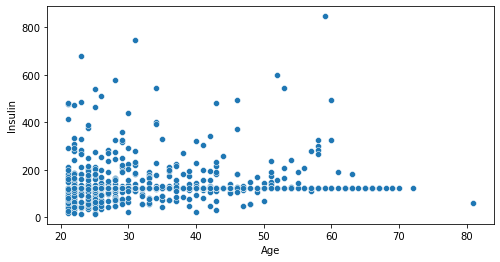

In [163]:
plt.figure(figsize = (8,4))
sns.scatterplot(x='Age',y='Insulin',data=data1)
plt.show()

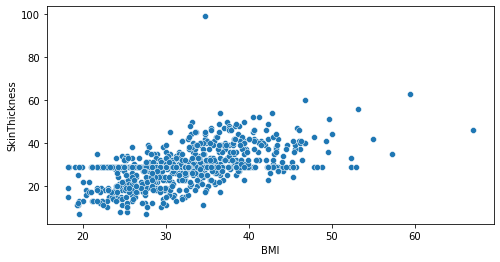

In [203]:
# Relationship between BMI and Skinthickness
plt.figure(figsize = (8,4))
sns.scatterplot(x='BMI',y='SkinThickness',data=data1)
plt.show()

#### The above scatterplot shows that SkinThickness and BMI have a linear relationship

### 5. Do Correlation Analysis using heatmap

<AxesSubplot:>

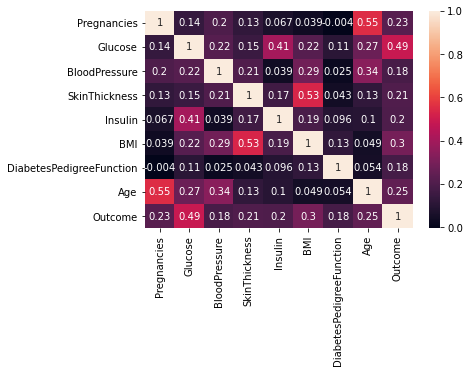

In [164]:
# plot the heatmap to find the correlation of features with each other and with the target column using the seaborn
sns.heatmap(data_clean.corr(), annot = True)

#### Above heatmap shows Glucose has high correlation with the dependant/target variable(Outcome) with value of 0.49. BMI and Age are also correlated.

#### DiabetesPedigreeFunction and BloodPressure variables are least correlated to target variable

### Remove target column from the dataset to build the model

In [165]:
y = data_clean.loc[:,'Outcome']
X = data_clean.drop(['Outcome'],axis = 1).copy()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30


### 6. Standardize data

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### 7. Split the data

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 12)

In [188]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (509, 8)
X_test (219, 8)
y_train (509,)
y_test (219,)


### Used the Train/Test split validation technique to validate the model. Reason for choosing is to understand how teh model behaves for unknown data.

### 8. Build the model

In [189]:
# 8.1 KNN model
from sklearn.neighbors import KNeighborsClassifier

# Build Model
KNN= KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,y_train)

# 8.2 Predict
y_pred= KNN.predict(X_test)

### Check model accuracy - classification report, AUC(ROC curve) etc.


 Accuracy score of KNN model is - 78.99543378995433

 Classification matrix - 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       147
           1       0.69      0.65      0.67        72

    accuracy                           0.79       219
   macro avg       0.76      0.75      0.76       219
weighted avg       0.79      0.79      0.79       219


 ROC/AUC - 



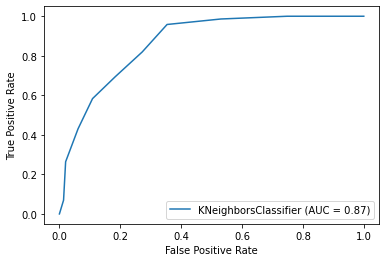


 Confusion matrix - 
 [[126  21]
 [ 25  47]]


In [217]:
# 8.3 Check model accuracy
KNN_accuracy = (accuracy_score(y_test, y_pred)* 100)  # this is test accuracy
print("\n Accuracy score of KNN model is - {}".format(KNN_accuracy))

# Create classification report
from sklearn.metrics import classification_report
#evaluating our model for prediction accuracy
print("\n Classification matrix - \n {}".format(classification_report(y_test, y_pred)))

# ROC curve and calculation of AUC
from sklearn import metrics

metrics.plot_roc_curve(KNN, X_test, y_test)
print("\n ROC/AUC - \n")
plt.show()

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion matrix - \n {}".format(cm))

#### From the above KNN model, accuracy score is 78% and AOC value is 87

### 8.4 Compare using other models

#### Logistic Regression model

In [218]:
from sklearn.linear_model import LogisticRegression

# Build model 
LogR = LogisticRegression()
LogR.fit(X_train, y_train)

# Predict
y_pred = LogR.predict(X_test)


 Accuracy score of Logistic Regression model is - 80.82191780821918

 Classification matrix - 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       147
           1       0.73      0.67      0.70        72

    accuracy                           0.81       219
   macro avg       0.79      0.77      0.78       219
weighted avg       0.81      0.81      0.81       219


 ROC/AUC - 



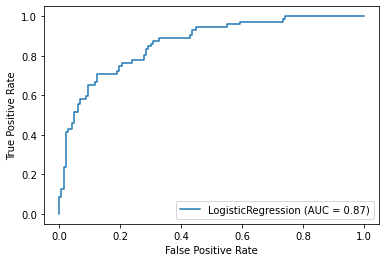


 Confusion matrix - 
 [[129  18]
 [ 24  48]]


In [219]:
# Check model accuracy
LogR_accuracy = (accuracy_score(y_test, y_pred) * 100)
print("\n Accuracy score of Logistic Regression model is - {}".format(LogR_accuracy))

# Classification report
print("\n Classification matrix - \n {}".format(classification_report(y_test, y_pred)))

# ROC
metrics.plot_roc_curve(LogR, X_test, y_test)
print("\n ROC/AUC - \n")
plt.show()

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion matrix - \n {}".format(cm))

In [220]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RFC= RandomForestClassifier(n_estimators=200, random_state=5, criterion='gini', max_depth=100)
RFC.fit(X_train,y_train)
y_pred= RFC.predict(X_test)


 Accuracy score of RandomForest model is - 79.90867579908677

 Classification matrix - 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       147
           1       0.69      0.69      0.69        72

    accuracy                           0.80       219
   macro avg       0.77      0.77      0.77       219
weighted avg       0.80      0.80      0.80       219


 ROC/AUC - 



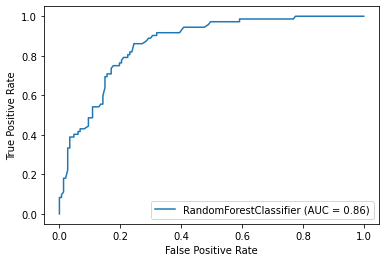


 Confusion matrix - 
 [[125  22]
 [ 22  50]]


In [221]:
# Check model accuracy
RFC_accuracy = (accuracy_score(y_test, y_pred) * 100)
print("\n Accuracy score of RandomForest model is - {}".format(RFC_accuracy))

# Classification report
print("\n Classification matrix - \n {}".format(classification_report(y_test, y_pred)))

# ROC
metrics.plot_roc_curve(rfc, X_test, y_test)
print("\n ROC/AUC - \n")
plt.show()

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion matrix - \n {}".format(cm))

In [222]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 40)
ADA.fit(X_train,y_train)
y_pred= ADA.predict(X_test)


 Accuracy score of ADABoost model is - 78.99543378995433

 Classification matrix - 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       147
           1       0.69      0.65      0.67        72

    accuracy                           0.79       219
   macro avg       0.76      0.75      0.76       219
weighted avg       0.79      0.79      0.79       219


 ROC/AUC - 



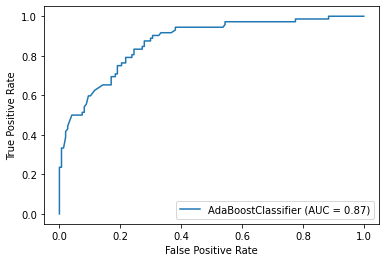


 Confusion matrix - 
 [[126  21]
 [ 25  47]]


In [223]:
# Check model accuracy
ADA_accuracy = (accuracy_score(y_test, y_pred) * 100)
print("\n Accuracy score of ADABoost model is - {}".format(ADA_accuracy))

# Classification report
print("\n Classification matrix - \n {}".format(classification_report(y_test, y_pred)))

# ROC
metrics.plot_roc_curve(ADA, X_test, y_test)
print("\n ROC/AUC - \n")
plt.show()

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion matrix - \n {}".format(cm))

### Displaying results for all four models

In [224]:
models_accuracy = {
    'Logistic Regression': LogR_accuracy,
    'K-Nearest Neighbors' : KNN_accuracy,
    'Random Forest': RFC_accuracy,
    'ADABoost Classifier': ADA_accuracy
    }

In [225]:
results = pd.DataFrame([[key, models_accuracy[key]] for key in models_accuracy.keys()],
                       columns=['Models', 'Accuracies']).sort_values('Accuracies', ascending=False)
results

,Models,Accuracies
0,Logistic Regression,80.821918
2,Random Forest,79.908676
1,K-Nearest Neighbors,78.995434
3,ADABoost Classifier,78.995434


#### Tried four different models(KNN, Logsitic regression, Random Forest and DABoost classifier). All four models are showing good accuracy scores and are very close with Logistic regression being the highest at 80% accuracy. 

### 9. Tableau Dashboard

[Click here to view the dashboard](https://public.tableau.com/app/profile/akumar8278/viz/Project2_Healthcare_AA/Dashboard1?publish=yes)

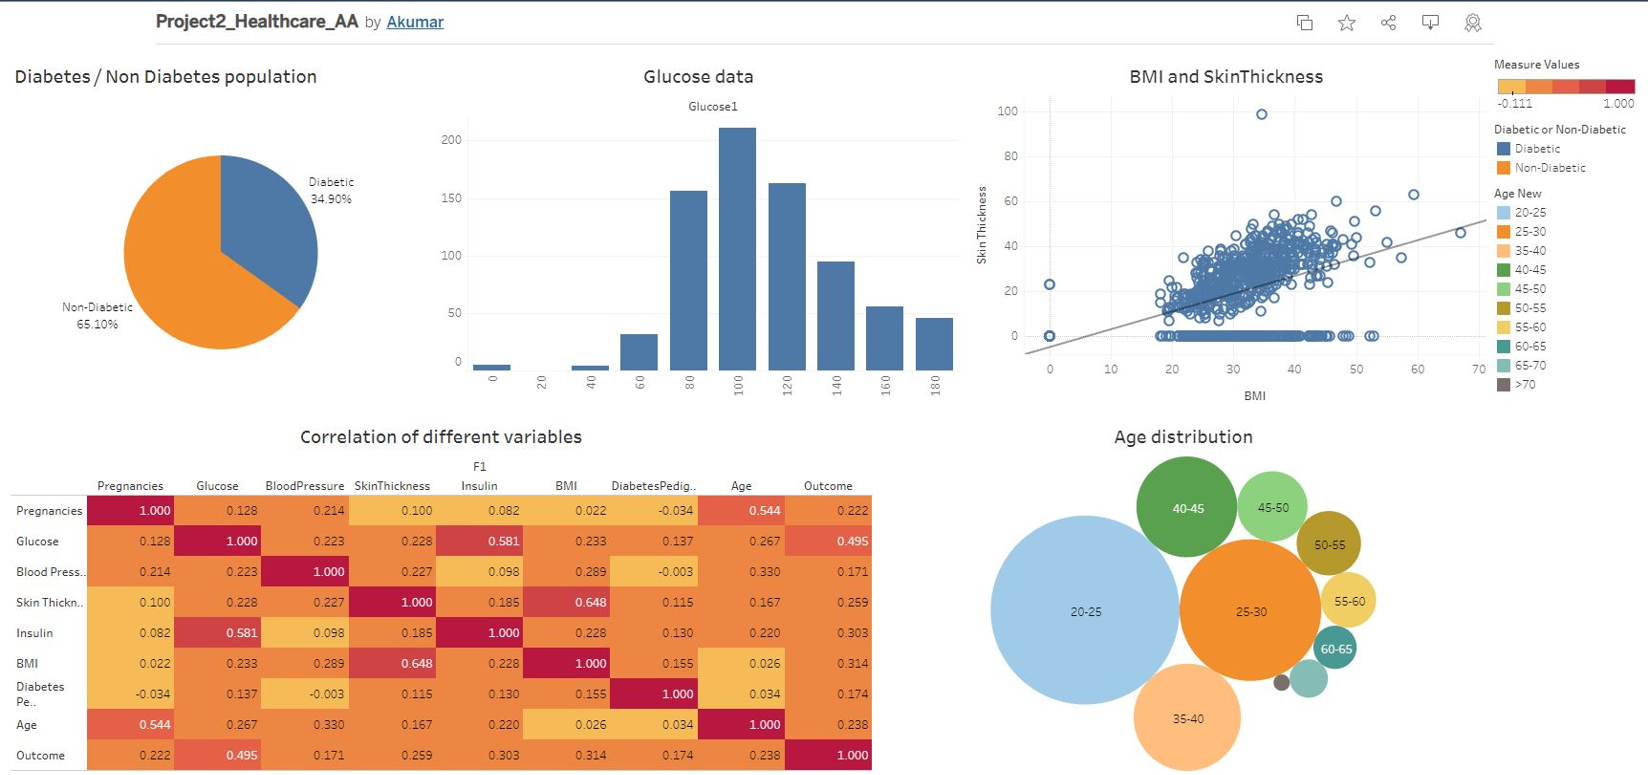